In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
# Lê o arquivo
data = pd.read_csv('data/raw/data.txt', header=None, names=['Tempo', 'Empuxo', 'Temperatura', 'Pressao'], sep='\t')

# Se alguma linha tiver 'not found' é removida
data = data[~data['Empuxo'].str.contains('not found')]
data = data[~data['Temperatura'].str.contains('not found')]
data = data[~data['Pressao'].str.contains('not found')]

# Limpa a string para deixar apenas os números de empuxo
data['Empuxo'] = data['Empuxo'].str.replace('HX711 reading:', '')
data['Empuxo'] = data['Empuxo'].str.replace(' Kg', '')

# Limpa a string para deixar apenas os números de temperatura
data['Temperatura'] = data['Temperatura'].str.replace('Temperatura:', '')
data['Temperatura'] = data['Temperatura'].str.replace(' °C', '')

# Limpa a string para deixar apenas os números de pressão
data['Pressao'] = data['Pressao'].str.replace('Pressão:', '')
data['Pressao'] = data['Pressao'].str.replace(' psi', '')

# Converte os números de string para float
data['Tempo'] = data['Tempo'].astype(float)
data['Empuxo'] = data['Empuxo'].astype(float)
data['Temperatura'] = data['Temperatura'].astype(float)
data['Pressao'] = data['Pressao'].astype(float)

# # Converte o tempo de ms para s
# data['Tempo'] = data['Tempo'] / 1000

# # Converte o empuxo de kg para N
# data['Empuxo'] = data['Empuxo'] * 9.81


data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4835 entries, 0 to 4839
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tempo        4835 non-null   float64
 1   Empuxo       4835 non-null   float64
 2   Temperatura  4815 non-null   float64
 3   Pressao      4835 non-null   float64
dtypes: float64(4)
memory usage: 188.9 KB


(     Tempo  Empuxo  Temperatura  Pressao
 0  51429.0    0.06        32.25    -1.22
 1  51531.0    0.06        32.25    -1.22
 2  51634.0    0.07        32.25    -1.22
 3  51736.0    0.06        32.25    -0.00
 4  51838.0    0.06        32.50    -1.22,
 None)

count    4835.000000
mean        1.876006
std        22.112568
min      -226.740000
25%        -0.050000
50%        -0.040000
75%         0.050000
max       360.660000
Name: Empuxo, dtype: float64

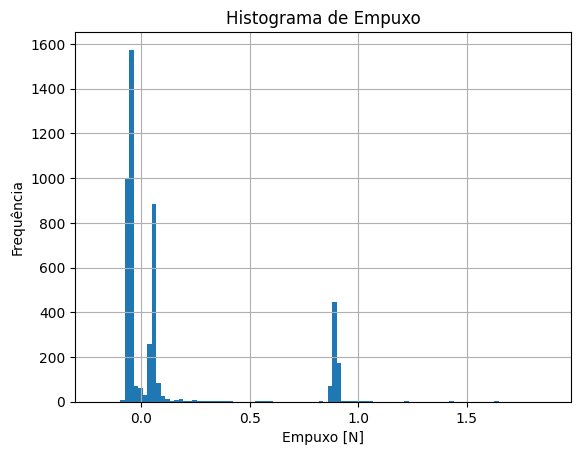

In [3]:
# Histograma para a distribuição dos valores lidos, útil para definir o corte da região de interesse 
plt.figure()
plt.hist(data['Empuxo'], bins=100, range=(-0.2, data['Empuxo'].mean()))
plt.title('Histograma de Empuxo')
plt.xlabel('Empuxo [N]')
plt.ylabel('Frequência')
plt.grid()

data['Empuxo'].describe()

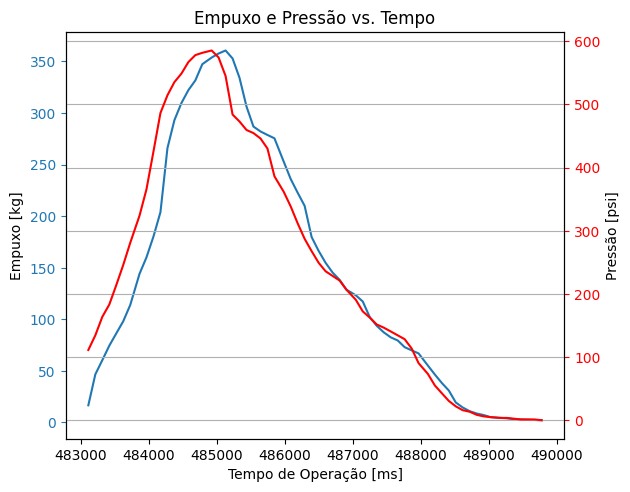

In [4]:
# Obtém os dados apenas de quando o motor está ativo
threshold = data['Empuxo'].mean() # Região onde foi possível notar um segundo pico de concentração no histograma
data_motor_on = data[data['Empuxo'] > threshold]

# Salva os dados limpos no formato Serra Rocketry
data_motor_on.to_csv('data/processed/GFRJ_data_cleaned.csv', index=False, sep=';')

# Plota os dados de Pressão e Empuxo
fig, ax1 = plt.subplots()

ax1.plot(data_motor_on['Tempo'], data_motor_on['Empuxo'])
ax1.set_xlabel('Tempo de Operação [ms]')
ax1.set_ylabel('Empuxo [kg]')
ax1.tick_params('y', colors='tab:blue')

ax2 = ax1.twinx()
ax2.plot(data_motor_on['Tempo'], data_motor_on['Pressao'], 'r-')
ax2.set_ylabel('Pressão [psi]')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Empuxo e Pressão vs. Tempo')
plt.grid()
plt.show()


In [5]:
# Final results
print(f'Impulso: {integrate.simpson(y=data_motor_on['Empuxo'], x=data_motor_on['Tempo']):.2f}')
print(f'Média: {data_motor_on['Empuxo'].mean():.2f}')
print(f'Máximo: {data_motor_on['Empuxo'].max():.2f}')
print(f'Duração: {data_motor_on['Tempo'].max()-data_motor_on['Tempo'].min():.2f}')


Impulso: 978690.78
Média: 144.19
Máximo: 360.66
Duração: 6669.00


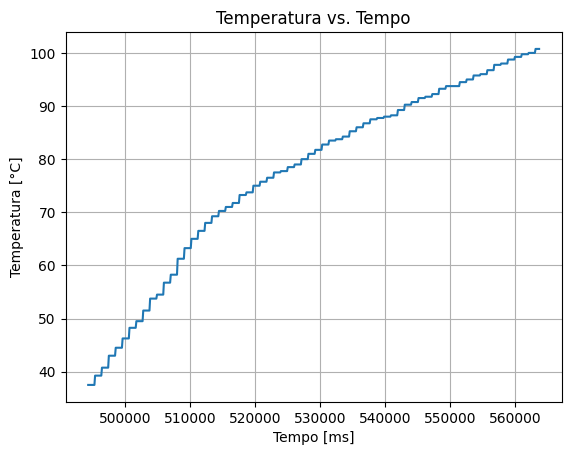

In [6]:
threshold = data['Temperatura'].mean()
data_temp = data[data['Temperatura'] > threshold]

# Plot temperature
plt.figure()
plt.plot(data_temp['Tempo'], data_temp['Temperatura'])
plt.title('Temperatura vs. Tempo')
plt.xlabel('Tempo [ms]')
plt.ylabel('Temperatura [°C]')
plt.grid()